In [10]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from keras.datasets import mnist
import random
import pickle
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='count'>

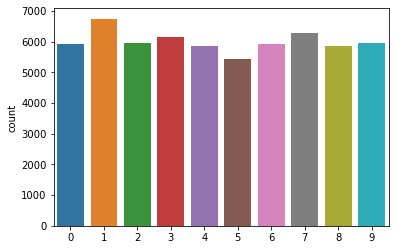

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
sns.countplot(y_train)

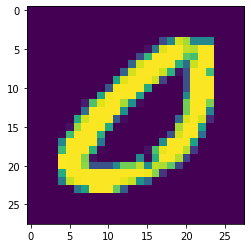

In [3]:
x_train = x_train.reshape(-1,28,28,1)
plt.imshow(x_train[random.randint(1,1000)][:,:,0])

In [4]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=1, random_state=1, learning_rate_init=.01, warm_start=True)
mlp.fit(x_train, y_train)
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))


Training set score: 0.999967
Test set score: 0.970900


In [11]:
pickle_out = open("clf.pkl","wb")
pickle.dump(mlp,pickle_out)
pickle_out.close()